In [1]:
def filter_for_ccps(tracks_to_check,
                    minimum_dnm2_counts=3,
                    sig_pval_cutoff=0.01,
                    minimum_lifetime=20,
                    maximum_lifetime=180,
                    initial_msd_threshold=0.02,
                    pixel_size=0.108):
    
    """return tracks that are sufficiently DNM2 rich, not too long or not too short, and aren’t too speedy"""
    tracks_kept = [] # the CCPs we’re keeping
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        track_lifetime = return_track_attributes.return_track_lifetime(tracks_to_check, i)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][1]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_dnm2_repeats = max_1s
        initial_msd = tracks_to_check[i][index_dictionary['index_MotionAnalysis']][0][0][1][0][0]
        initial_msd = pixel_size**2 * initial_msd
       
        if track_lifetime >= minimum_lifetime and \
           track_lifetime <= maximum_lifetime and \
           max_dnm2_repeats >= minimum_dnm2_counts and \
           initial_msd <= initial_msd_threshold:
            tracks_kept.append(tracks_to_check[i])
    return tracks_kept

In [2]:
def filter_for_ccps_with_nef(tracks_to_check,
                    minimum_nef_counts=3,
                    sig_pval_cutoff=0.01):
    
    """return tracks that are sufficiently nef rich, not too long or not too short, and aren’t too speedy"""
    tracks_kept = [] # the CCPs we’re keeping
    tracks_discarded = []
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][2]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_nef_repeats = max_1s
    
       
        if max_nef_repeats >= minimum_nef_counts:
            tracks_kept.append(tracks_to_check[i])
        else:
            tracks_discarded.append(tracks_to_check[i])
#     print(len(tracks_kept), len(tracks_discarded))
    return tracks_kept, tracks_discarded

In [3]:
def index_filter_for_ccps(tracks_to_check,
                          presort_index,
                          minimum_dnm2_counts=3,
                          sig_pval_cutoff=0.01,
                          minimum_lifetime=20,
                          maximum_lifetime=180,
                          initial_msd_threshold=0.02,
                          pixel_size=0.108):
                          
                            
    
    """return tracks that are sufficiently DNM2 rich, not too long or not too short, and aren’t too speedy"""
    index_kept = [] # the index of CCP's we’re keeping
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        track_lifetime = return_track_attributes.return_track_lifetime(tracks_to_check, i)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][1]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_dnm2_repeats = max_1s
        initial_msd = tracks_to_check[i][index_dictionary['index_MotionAnalysis']][0][0][1][0][0]
        initial_msd = pixel_size**2 * initial_msd
       
        if track_lifetime >= minimum_lifetime and \
           track_lifetime <= maximum_lifetime and \
           max_dnm2_repeats >= minimum_dnm2_counts and \
           initial_msd <= initial_msd_threshold:
            index_kept.append(presort_index[i])
            
    return index_kept

In [4]:
def index_filter_for_ccps_with_nef(tracks_to_check,
                                   presort_index,
                                   minimum_nef_counts=3,
                                   sig_pval_cutoff=0.01):
    
    """return tracks that are sufficiently nef rich, not too long or not too short, and aren’t too speedy"""
    index_kept = [] # the index of CCPs we’re keeping
    index_discarded = [] # the index of CCPs we're discarding
    for i in tqdm(range(len(tracks_to_check))): # iterate through all tracks
        # iterate through tracks that satisfy a condition:
        # and make sure track is category 1 (valids with good gaps)
        pvals = tracks_to_check[i][index_dictionary['index_pval_Ar']][2]
        significant_pval_indices = [1 if pval < sig_pval_cutoff else 0 for pval in pvals]
        repeated_indices = [(x[0], len(list(x[1]))) for x in itertools.groupby(significant_pval_indices)]
        max_1s = 0
        for itm in repeated_indices:
            if itm[0] == 1:
                if itm[1]>max_1s:
                    max_1s=itm[1]
        max_nef_repeats = max_1s
    
       
        if max_nef_repeats >= minimum_nef_counts:
            index_kept.append(presort_index[i])
        else:
            index_discarded.append(presort_index[i])
#     print(len(tracks_kept), len(tracks_discarded))
    return index_kept, index_discarded

In [5]:
# Function for comparing two lists to eliminate all items in list two present in list 1. Useful for deciding filtering parameters. 

def remove(l1, l2):
    r = set()
    r = set(l1).difference(set(l2))
    r = list(r)
    
    return r

In [6]:
# set a path to the prefix of the pooled working directory with all of the data 
# the folder that contains all data for this analysis is 'ap2dynm2arcp3_project'
# (this folder, containing all raw and tracking data, is available upon request)
unique_user_path_notebook = 'C:/Users/yuyu2/Dropbox/Drubin_Hurley_Lab/Analysis Code/20210406_cmeAnalysisPostProcessingPythonScripts'
unique_user_saved_outputs = 'C:/Users/yuyu2/Desktop/Test/'

# import all necessary Python modules

In [7]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Image
import itertools
import scipy.interpolate as interpolate
import re
import seaborn as sns
import random

#sys.path.append(unique_user_path_notebook+'/cmeAnalysisPostProcessingPythonScripts') # add custom Python scripts to the local path
import display_tracks
import merge_tools
import feature_extraction_with_buffer
import generate_index_dictionary
import return_track_attributes

# batch load nef tracks

In [8]:
tracks_path = 'E:/Analysis/NL43NefCme/AP2DNM2Nef_ringTIRF_segment_good/20210616'
track_directories = os.listdir(tracks_path)

In [9]:
movie_number = []
cell_number = []
cell_condition = []
all_tracks = []

condition_map = {'1':-1,
                 '2':-1,
                 '3':-1,
                 '4':0,
                 '5':0,
                 '6':0,
                 '7':2,
                 '8':2,
                 '9':2,
                 '10':4,
                 '11':4,
                 '12':4,
                 '13':6,
                 '14':6,
                 '15':6,
                 '16':24,
                 '17':24,
                 '18':24}

for cell in track_directories:
    split = re.split('-|_',cell)
    movie_number.append(split[0][4:])
    cell_number.append(split[1])
    cell_condition.append(condition_map[movie_number[-1]])
    all_tracks.append(display_tracks.load_tracks(tracks_path+'/'+cell+'/Ch1/Tracking/ProcessedTracks.mat'))


In [10]:
index_dictionary = generate_index_dictionary.return_index_dictionary()


In [11]:
all_tracks[43][3][index_dictionary['index_catIdx']][0][0]

8

# Filtering Nef tracks

In [11]:
valid_tracks = []

for tracks in all_tracks:
    
    valid_tracks.append(display_tracks.remove_tracks_by_criteria(tracks, track_category=[1]))

The number of tracks returned: 239

The number of tracks returned: 91

The number of tracks returned: 106

The number of tracks returned: 151

The number of tracks returned: 88

The number of tracks returned: 160

The number of tracks returned: 71

The number of tracks returned: 110

The number of tracks returned: 258

The number of tracks returned: 98

The number of tracks returned: 108

The number of tracks returned: 99

The number of tracks returned: 194

The number of tracks returned: 358

The number of tracks returned: 157

The number of tracks returned: 188

The number of tracks returned: 265

The number of tracks returned: 122

The number of tracks returned: 167

The number of tracks returned: 141

The number of tracks returned: 105

The number of tracks returned: 101

The number of tracks returned: 218

The number of tracks returned: 102

The number of tracks returned: 176

The number of tracks returned: 71

The number of tracks returned: 78

The number of tracks returned: 195


In [12]:
filtered_valid_tracks = []

for tracks in valid_tracks:
    
    tempFilteredTracks = filter_for_ccps(tracks,
                         minimum_dnm2_counts=3,
                         sig_pval_cutoff=0.01,
                         minimum_lifetime=10,
                         maximum_lifetime=180,
                         initial_msd_threshold=0.02,
                         pixel_size=0.108)
    print(len(tempFilteredTracks))
    filtered_valid_tracks.append(tempFilteredTracks)


  0%|                                                                                          | 0/153 [00:00<?, ?it/s]

42
11
14
38
19
33
11
17
11
6
6
18
23
26
23
31
16
12
18
29
4
10
26
9
38
16
9
23
17
11
12
2
13
16
7
12
10
7
3
23
11
19
12
29
12
14


  0%|                                                                                          | 0/107 [00:00<?, ?it/s]

16
9
26
4
14
7
15
6
6
4
8
13
6
10
10
1
10
11
26
13
20
16
32
10
38
19
16
17
20
5
20
16
12
24
11
17
1
8
10
22
12
5
6
16
25
24
9


  0%|                                                                                          | 0/527 [00:00<?, ?it/s]

14
30
35
2
17
10
13
2
18
25
25
25
8
34
21
37
14
18
21
22
18
14
4
8
29
17
4
11
21
11
23
28
21
19
26
10
23
11
9
14
8
30
8
8
15
9
16
6
18
20
7
17


100%|█████████████████████████████████████████████████████████████████████████████| 147/147 [00:00<00:00, 73452.79it/s]


40
42
17
4
10
32
36
4
20
7
13
1
5
3
18
33
22
25
16
10
29
14
3
11
4
11
5
15
2
18
17
20
11
12
21
24


  0%|                                                                                          | 0/103 [00:00<?, ?it/s]

10
5
6
14
20
11
16
12
8
14
15
4
8
11
13
10
17
6
20
22
51
15
20
8
19
6
17
15
10
11
11
10
8
9
13
13
12
16
23
23
9
42
17
9
20
21
16
15
10
30
49


  0%|                                                                                          | 0/262 [00:00<?, ?it/s]

20
20
8
13
6
23
35
22
16
7
11
10
25
3
9
13
13
3
10
18
26
27
11
7
12
23
50
21
33
44
17
21
39
53
20


  0%|                                                                                          | 0/379 [00:00<?, ?it/s]

18
33
39
36
37
51
57
13
28
32
39
28
24
8
18
29
25
36
50
29
38
28
33
15
20
19
52
32
28
33
13
21
27


  0%|                                                                                          | 0/102 [00:00<?, ?it/s]

31
33
32
38
40
17
57
29
2
24
9
24
12
33
13
13
7
1
7
10
38
2
15
10
19
35
12
18
39
40
12
10
6
15
6
6
13
15
19


100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 48956.86it/s]

33
25
18
18
26
14
10


In [22]:
filtered_valid_tracks_nef_positive = []
filtered_valid_tracks_nef_negative = []

total_positive = 0 

for tracks in filtered_valid_tracks:
    
    nef_pos, nef_neg = filter_for_ccps_with_nef(tracks,
                                                minimum_nef_counts=3,
                                                sig_pval_cutoff=0.01)
    
    #num_neg = len(nef_neg)
    #num_pos = len(nef_pos)
#     print(len(nef_neg))
    filtered_valid_tracks_nef_positive.append(nef_pos)
    filtered_valid_tracks_nef_negative.append(nef_neg)
    #print('fraction nef positive', num_pos/(num_pos + num_neg))
    total_positive = total_positive + len(nef_pos)
    
print(total_positive)

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9988.82it/s]

727


# Change Pval to see whether number of Nef positive events change

In [ ]:
pval_list = [10E-1, 10E-2, 10E-3, 10E-4, 10E-5, 10E-6, 10E-7, 10E-8, 10E-9, 10E-10, 10E-11, 10E-12, 10E-13, 10E-14, 10E-15, 10E-16, 10E-17, 10E-18, 10E-19, 10E-20]
total_positive = []

for i in range(len(pval_list)):
    
    pval = pval_list[i]
    positive_count = 0
    
    for tracks in filtered_valid_tracks:
    
        nef_pos, nef_neg = filter_for_ccps_with_nef(tracks,
                                                    minimum_nef_counts=3,
                                                    sig_pval_cutoff=pval)
        
        positive_count = positive_count + len(nef_pos)
        
    total_positive.append(positive_count)
    



100%|██████████████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<?, ?it/s]

In [46]:
total_positive

[1323,
 766,
 727,
 698,
 672,
 651,
 632,
 614,
 598,
 574,
 561,
 550,
 542,
 528,
 518,
 502,
 496,
 480,
 472,
 465]

In [44]:
10E-2

0.1

[Text(0.5, 1.0, 'Effect of Nef pval on determining Nef positive events')]

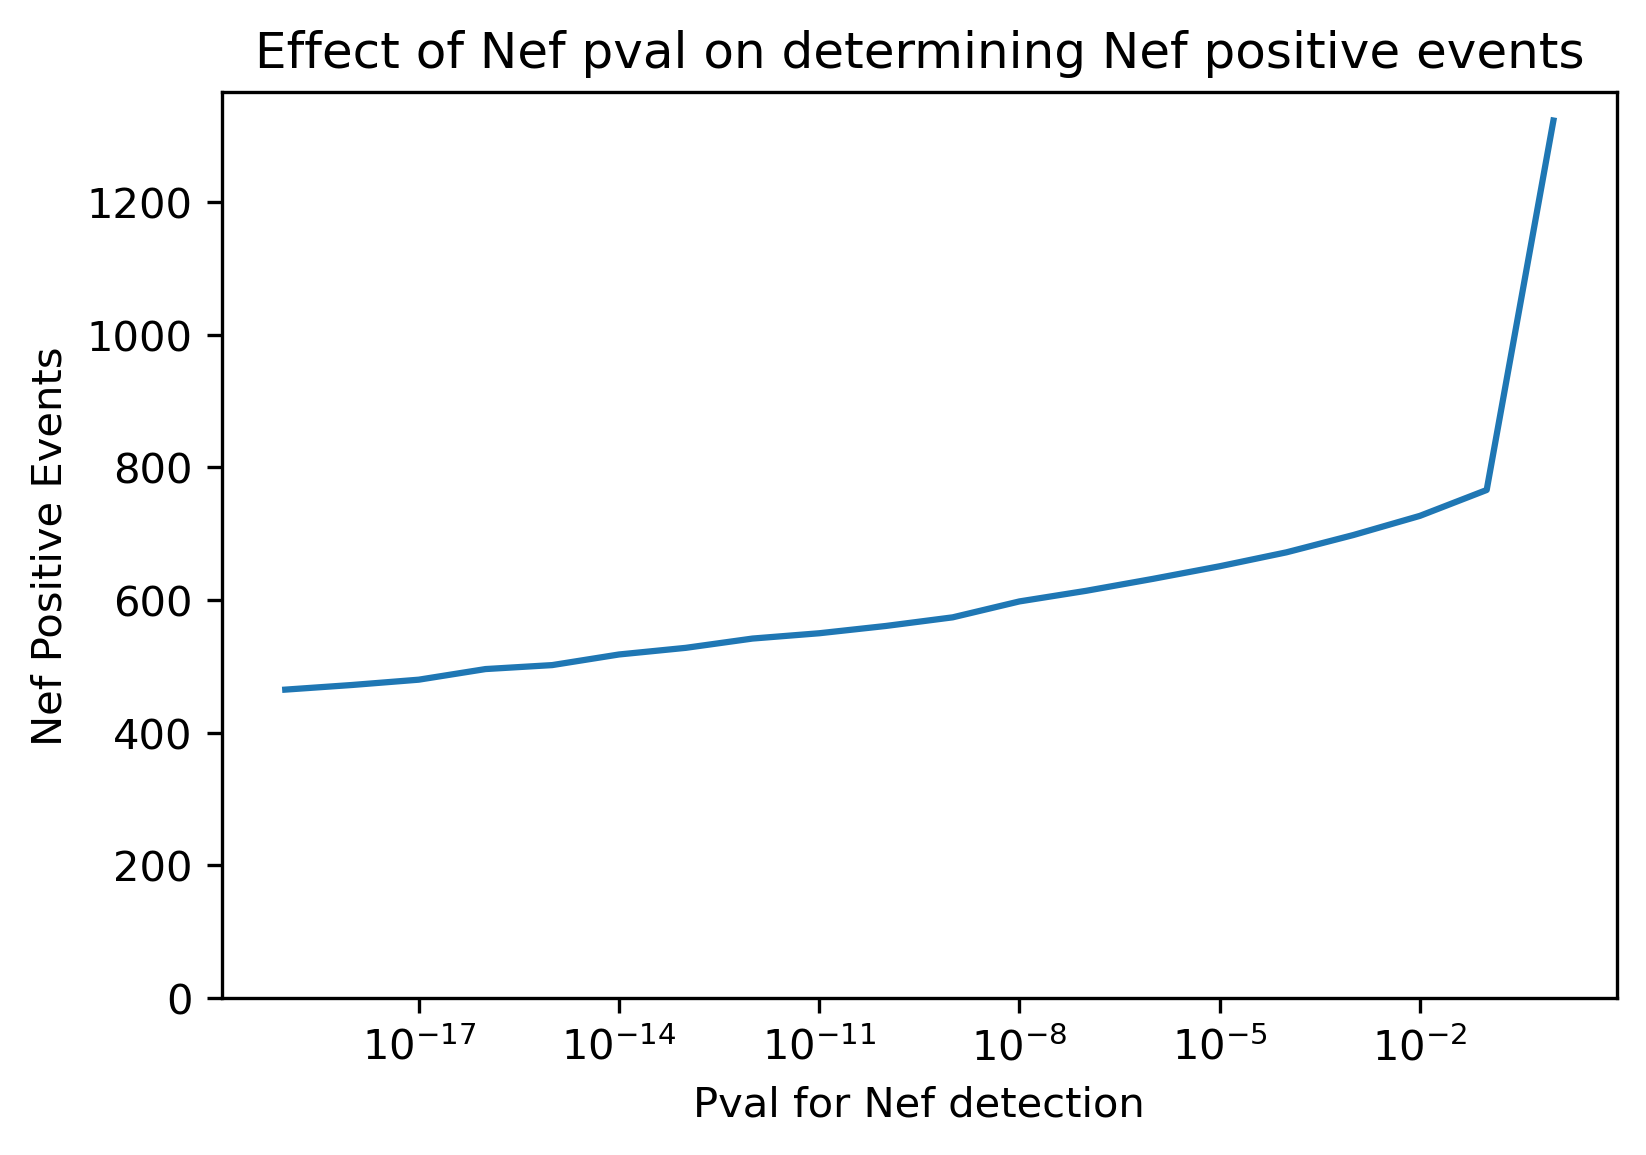

In [52]:
plt.figure(dpi=300)
graph = sns.lineplot(x = pval_list, y = total_positive)
graph.set(xscale='log')
graph.set(ylim = (0, None))
graph.set(ylabel = 'Nef Positive Events')
graph.set(xlabel = 'Pval for Nef detection')
graph.set(title = 'Effect of Nef pval on determining Nef positive events')

# Change consecutive number of detections to see whether number of Nef positive events change

In [53]:
consecutive_list = [1,2,3,4,5,6,7,8,9,10]
total_positive = []

for i in range(len(consecutive_list)):
    
    consecutive = consecutive_list[i]
    positive_count = 0
    
    for tracks in filtered_valid_tracks:
    
        nef_pos, nef_neg = filter_for_ccps_with_nef(tracks,
                                                    minimum_nef_counts= consecutive,
                                                    sig_pval_cutoff= 0.01)
        
        positive_count = positive_count + len(nef_pos)
        
    total_positive.append(positive_count)
    



100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [54]:
total_positive

[3595, 1429, 727, 421, 256, 176, 117, 89, 59, 45]

[Text(0.5, 1.0, 'Effect of Nef pval on determining Nef positive events')]

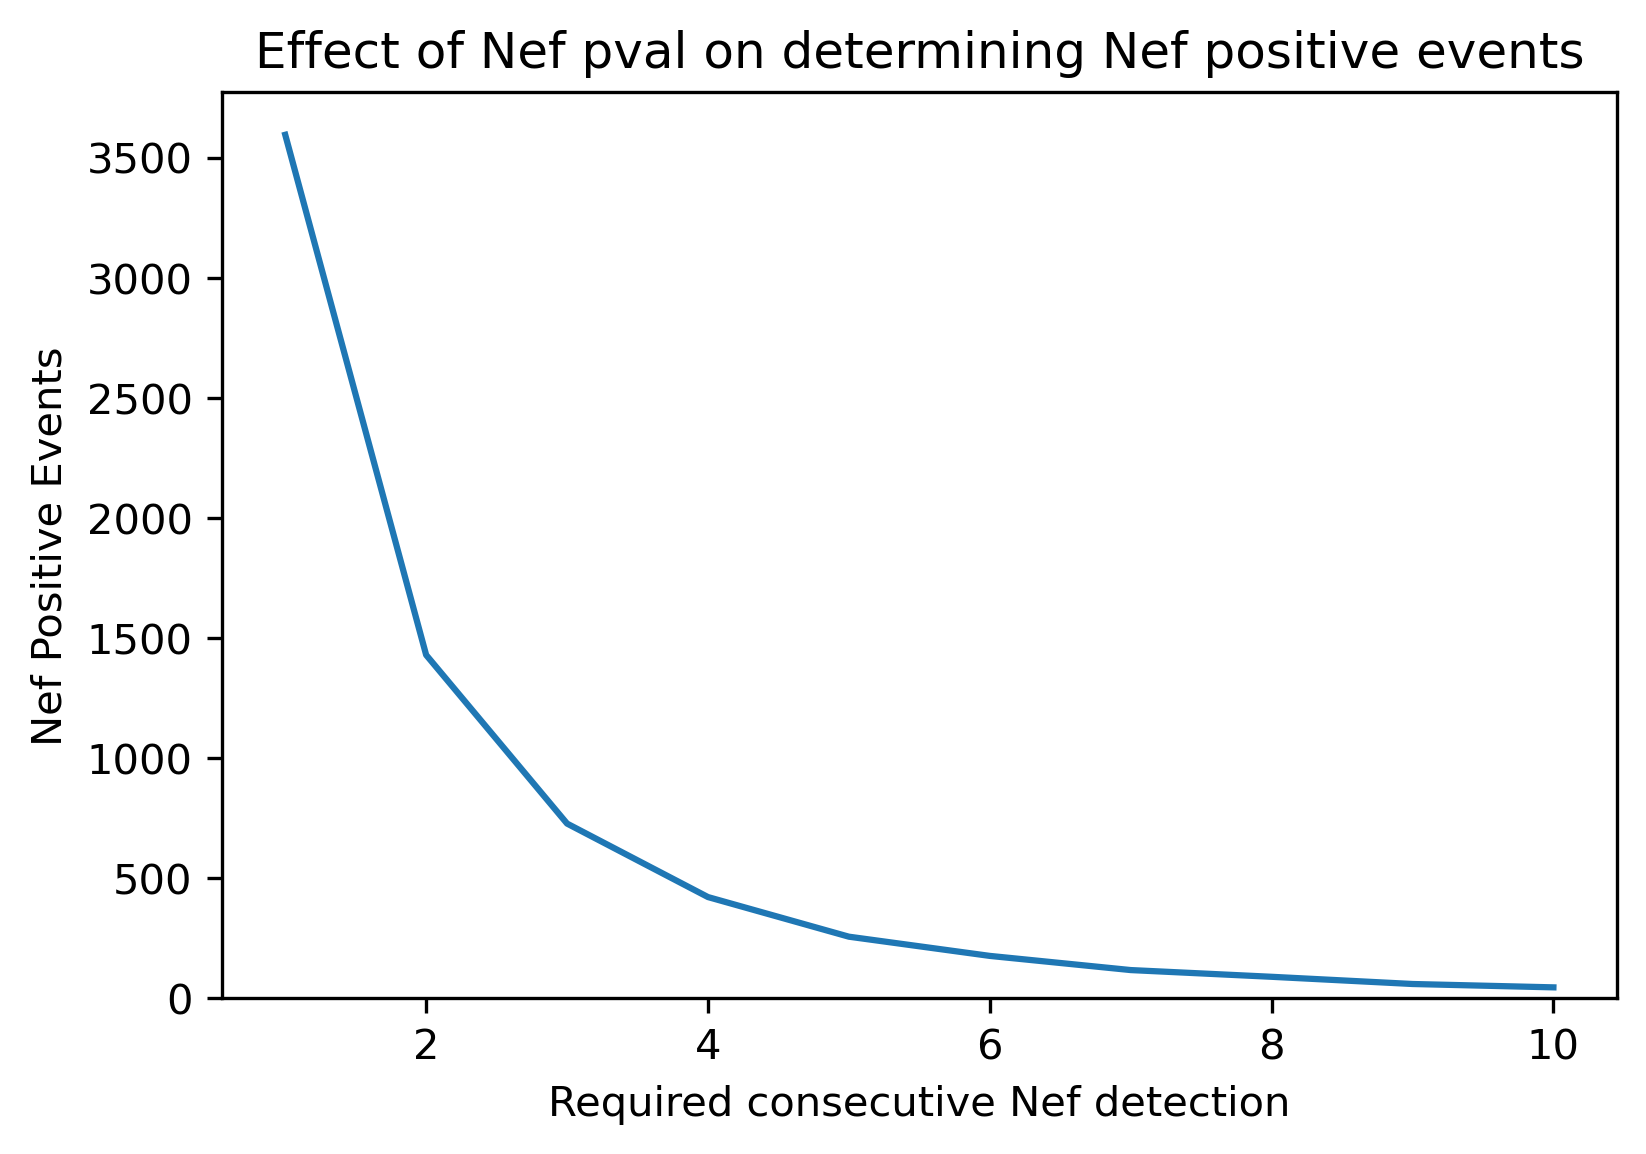

In [55]:
plt.figure(dpi=300)
graph = sns.lineplot(x = consecutive_list, y = total_positive)
graph.set(ylim = (0, None))
graph.set(ylabel = 'Nef Positive Events')
graph.set(xlabel = 'Required consecutive Nef detection')
graph.set(title = 'Effect of Nef pval on determining Nef positive events')

# Tentative filter parameters pval 0.01, 4 consecutive detections

In [56]:
filtered_valid_tracks_nef_positive = []
filtered_valid_tracks_nef_negative = []

for tracks in filtered_valid_tracks:
    
    nef_pos, nef_neg = filter_for_ccps_with_nef(tracks,
                                                minimum_nef_counts=3,
                                                sig_pval_cutoff=0.01)
    
    num_neg = len(nef_neg)
    num_pos = len(nef_pos)
#     print(len(nef_neg))
    filtered_valid_tracks_nef_positive.append(nef_pos)
    filtered_valid_tracks_nef_negative.append(nef_neg)
    print('fraction nef positive', num_pos/(num_pos + num_neg))

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.02631578947368421
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.06451612903225806
fraction nef positive 0.0625
fraction nef positive 0.25
fraction nef positive 0.3333333333333333
fraction nef positive 0.3448275862068966
fraction nef positive 0.0
fraction nef positive 0.2
fraction nef positive 0.038461538461538464
fraction nef positive 0.1111111111111111
fraction nef positive 0.2631578947368421
fraction nef positive 0.0625
fraction nef positive 0.2222222222222222
fraction nef positive 0.21739130434782608
fraction nef positive 0.058823529411764705
fraction nef positive 0.18181818181818182
fraction nef positive 0.1666666666666666

100%|██████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<?, ?it/s]

fraction nef positive 0.0
fraction nef positive 0.2777777777777778
fraction nef positive 0.08
fraction nef positive 0.2
fraction nef positive 0.08
fraction nef positive 0.0
fraction nef positive 0.08823529411764706
fraction nef positive 0.047619047619047616
fraction nef positive 0.1891891891891892
fraction nef positive 0.21428571428571427
fraction nef positive 0.05555555555555555
fraction nef positive 0.23809523809523808
fraction nef positive 0.18181818181818182
fraction nef positive 0.2222222222222222
fraction nef positive 0.35714285714285715
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.13793103448275862
fraction nef positive 0.23529411764705882
fraction nef positive 0.5
fraction nef positive 0.0
fraction nef positive 0.23809523809523808
fraction nef positive 0.2727272727272727
fraction nef positive 0.34782608695652173
fraction nef positive 0.25
fraction nef positive 0.23809523809523808
fraction nef positive 0.05263157894736842
fraction nef positive 0.11


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

fraction nef positive 0.38461538461538464
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.3333333333333333
fraction nef positive 0.16666666666666666
fraction nef positive 0.2727272727272727
fraction nef positive 0.3181818181818182
fraction nef positive 0.44
fraction nef positive 0.0625
fraction nef positive 0.4
fraction nef positive 0.41379310344827586
fraction nef positive 0.5
fraction nef positive 0.3333333333333333
fraction nef positive 0.18181818181818182
fraction nef positive 0.5
fraction nef positive 0.45454545454545453
fraction nef positive 0.6
fraction nef positive 0.3333333333333333
fraction nef positive 1.0
fraction nef positive 0.3333333333333333
fraction nef positive 0.23529411764705882
fraction nef positive 0.25
fraction nef positive 0.0
fraction nef positive 0.4166666666666667
fraction nef positive 0.3333333333333333
fraction nef positive 0.5
fraction nef positive 0.2
fraction nef positive 0.2
fraction nef positive 0.6666666666666666
fraction n

  0%|                                                                                           | 0/33 [00:00<?, ?it/s]

fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.14285714285714285
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]

fraction nef positive 0.06060606060606061
fraction nef positive 0.07692307692307693
fraction nef positive 0.0
fraction nef positive 0.1111111111111111
fraction nef positive 0.12903225806451613
fraction nef positive 0.030303030303030304
fraction nef positive 0.03125
fraction nef positive 0.05263157894736842
fraction nef positive 0.1
fraction nef positive 0.058823529411764705
fraction nef positive 0.017543859649122806
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.25
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.09090909090909091
fraction nef positive 0.15384615384615385
fraction nef positive 0.15384615384615385
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.5
fraction nef positive 0.0
fraction nef positive 0.0
fraction nef positive 0.13333333333333333
fraction nef positive 0.1
fraction nef positive 0.15789473684210525
fraction nef positive 0.0285714

# Creating dataframe with ctrl and nef tracks

Dataframe for Nef tracks

In [57]:
labels_lifetimes_intensities = []

lifetimes = []
max_int_ap2 = []
max_int_dnm2 = []
max_int_nef = []
labels = []
nef_status = []
max_consecutive_dnm2 = []

for cond, tracks in enumerate(filtered_valid_tracks_nef_positive):

    features_nef_pos = feature_extraction_with_buffer.TrackFeatures(tracks) # an instance of a to-be feature matrix of tracks
    features_nef_pos.add_features(['lifetime', 'max_int_ch0', 'max_int_ch1', 'max_int_ch2', 'max_consecutive_significant_ch1']) # set the features to be extracted
    features_nef_pos.extract_features() # extract all features
    features_nef_pos = features_nef_pos.feature_matrix # feature matrix for all tracks
    
    lifetimes.append(features_nef_pos[:,0])
    max_int_ap2.append(features_nef_pos[:,1])
    max_int_dnm2.append(features_nef_pos[:,2])
    max_int_nef.append(features_nef_pos[:,3])
    max_consecutive_dnm2.append(features_nef_pos[:,4])
    
    #print(features_nef_pos.shape)
    labels.append([cell_condition[cond] for i in range(features_nef_pos.shape[0])])
    nef_status.append([1 for i in range(features_nef_pos.shape[0])])
    
for cond, tracks in enumerate(filtered_valid_tracks_nef_negative):

    features_nef_pos = feature_extraction_with_buffer.TrackFeatures(tracks) # an instance of a to-be feature matrix of tracks
    features_nef_pos.add_features(['lifetime', 'max_int_ch0', 'max_int_ch1', 'max_int_ch2', 'max_consecutive_significant_ch1']) # set the features to be extracted
    features_nef_pos.extract_features() # extract all features
    features_nef_pos = features_nef_pos.feature_matrix # feature matrix for all tracks
    
    lifetimes.append(features_nef_pos[:,0])
    max_int_ap2.append(features_nef_pos[:,1])
    max_int_dnm2.append(features_nef_pos[:,2])
    max_int_nef.append(features_nef_pos[:,3])
    max_consecutive_dnm2.append(features_nef_pos[:,4])
    
    labels.append([cell_condition[cond] for i in range(features_nef_pos.shape[0])])    
    nef_status.append([0 for i in range(features_nef_pos.shape[0])])

In [58]:
lifetimes = [lifetimes[i][j] for i in range(len(lifetimes)) for j in range(len(lifetimes[i]))]
max_int_ap2 = [max_int_ap2[i][j] for i in range(len(max_int_ap2)) for j in range(len(max_int_ap2[i]))]
max_int_dnm2 = [max_int_dnm2[i][j] for i in range(len(max_int_dnm2)) for j in range(len(max_int_dnm2[i]))]
max_int_nef = [max_int_nef[i][j] for i in range(len(max_int_nef)) for j in range(len(max_int_nef[i]))]
max_consecutive_dnm2 = [max_consecutive_dnm2[i][j] for i in range(len(max_consecutive_dnm2)) for j in range(len(max_consecutive_dnm2[i]))]
labels = [labels[i][j] for i in range(len(labels)) for j in range(len(labels[i]))]
nef_status = [nef_status[i][j] for i in range(len(nef_status)) for j in range(len(nef_status[i]))]

In [59]:
array_features = np.array([lifetimes, max_int_ap2, max_int_dnm2, max_int_nef, max_consecutive_dnm2, labels, nef_status]).T

In [60]:
df_features = pd.DataFrame(data=array_features, columns=['lifetime', 'max_ap2', 'max_dnm2', 'max_int_nef', 'max_consecutive_dnm2', 'condition', 'nef_status'])

In [61]:
df_features

,lifetime,max_ap2,max_dnm2,max_int_nef,max_consecutive_dnm2,condition,nef_status
0,118.0,1138.905237,1016.893519,48.759327,18.0,-1.0,1.0
1,70.0,730.035588,811.300766,74.463254,15.0,-1.0,1.0
2,68.0,917.175281,1453.522949,46.503455,14.0,-1.0,1.0
3,110.0,801.098840,1614.879750,49.985217,33.0,-1.0,1.0
4,92.0,346.917833,982.535842,125.782096,20.0,4.0,1.0
...,...,...,...,...,...,...,...
6233,84.0,653.396785,839.956575,28.948016,9.0,2.0,0.0
6234,72.0,852.341009,614.424474,45.981532,13.0,2.0,0.0
6235,56.0,419.057103,642.375610,21.406313,19.0,2.0,0.0
6236,56.0,218.754318,630.463383,25.580252,11.0,2.0,0.0


dataframe for control tracks. Induction condition set to '-1'

# Indexing. Valid tracks, filtered tracks, and nef +/- tracks

In [62]:
valid_index = []

for i in range(len(all_tracks)):
    valid_index.append([])
    for k in range(len(all_tracks[i])):        
        if all_tracks[i][k][index_dictionary['index_catIdx']][0][0] == 1:
            valid_index[i].append(k+1)

In [63]:
filtered_valid_index = []
for i in range(len(valid_tracks)):
    filtered_address = index_filter_for_ccps(valid_tracks[i],
                                             valid_index[i],
                                             minimum_dnm2_counts=3,
                                             sig_pval_cutoff=0.01,
                                             minimum_lifetime=10,
                                             maximum_lifetime=180,
                                             initial_msd_threshold=0.02,
                                             pixel_size=0.108)

    filtered_valid_index.append(filtered_address)

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 24478.43it/s]


In [64]:
nef_pos_filtered_valid_index = []
nef_neg_filtered_valid_index = []

for i in range(len(filtered_valid_tracks)):
    
    nef_pos_address, nef_neg_address = index_filter_for_ccps_with_nef(filtered_valid_tracks[i],
                                                                      filtered_valid_index[i],
                                                                      minimum_nef_counts=4,
                                                                      sig_pval_cutoff=0.01)
    nef_pos_filtered_valid_index.append(nef_pos_address)
    nef_neg_filtered_valid_index.append(nef_neg_address)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<?, ?it/s]


In [67]:
nef_pos_filtered_valid_track_address = []
nef_neg_filtered_valid_track_address = []

for i in range(len(nef_pos_filtered_valid_index)):
    for k in range(len(nef_pos_filtered_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_pos_filtered_valid_index[i][k])
        nef_pos_filtered_valid_track_address.append(address)
        
for i in range(len(nef_neg_filtered_valid_index)):
    for k in range(len(nef_neg_filtered_valid_index[i])):
        address = 'Cell' + str(movie_number[i]) + '-' + str(cell_number[i]) + '-' + 'track' + str(nef_neg_filtered_valid_index[i][k])
        nef_neg_filtered_valid_track_address.append(address)

In [70]:
len(nef_pos_filtered_valid_track_address)

421

In [74]:
csv_tracks = random.sample(nef_pos_filtered_valid_track_address, 100)

In [75]:
address = pd.DataFrame(data = csv_tracks, columns = ['address'])

In [77]:
address.to_csv(path_or_buf = unique_user_saved_outputs + 'nef_pos_filtered_valid_track_address_4_consecutive.txt', sep = ',', index = False)